In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
Base = automap_base()

In [7]:
# Reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [10]:
# Create our session (link) from Python to the DB
conn = engine.connect()

# Step 1 - Climate Analysis and Exploration

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [12]:
# Query All Records in the the Measurement Database
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [13]:
# Query All Records in the the Station Database
station_data = pd.read_sql("SELECT * FROM station", conn)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


## Precipitation Analysis

In [14]:
# Calculate the date 1 year ago from the lastest date in the data table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f"The last date in the data table is {last_date}.")

The last date in the data table is 2017-08-23.


In [15]:
# Retrieve the last 12 months of data using last date - 365 
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date range starts {} and ends {}".format(start_date,last_date))

Date range starts 2016-08-23 and ends 2017-08-23


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date)

In [17]:
# Create dataframe & set index
precip_df = pd.DataFrame(precip, columns=['date','prcp'])
precip_df.set_index('date', inplace=True)

# Sort dataframe by date
sorted_df = precip_df.sort_values("date")
sorted_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


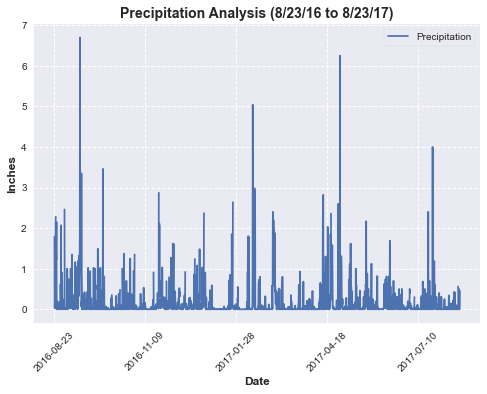

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot()
plt.title("Precipitation Analysis (8/23/16 to 8/23/17)", size=14, fontweight='bold')
plt.xlabel("Date", size=12, fontweight='bold')
plt.ylabel("Inches", size=12, fontweight='bold')

plt.legend(["Precipitation"], frameon=True, loc="upper right")

plt.xticks(rotation=45)
#plt.tight_layout()
plt.grid(linestyle='--')
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [20]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations in this dataset.".format(total_stations))

There are 9 stations in this dataset.


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
busiest_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                   order_by(func.count(Measurement.tobs).desc()).all()

busiest = busiest_stations[0][0]    
print("Station",busiest,"was the most active with",busiest_stations[0][1],"weather observations.")
print()
print("In descending order, Stations with most number of observations were as follows:")
for station, count in busiest_stations:
    print("Station",station,"had",count, "weather observations.")

Station USC00519281 was the most active with 2772 weather observations.

In descending order, Stations with most number of observations were as follows:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()

[(54.0, 71.66378066378067, 85.0)]

In [23]:
result = session.query(Measurement.tobs)\
    .filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>=start_date).all()

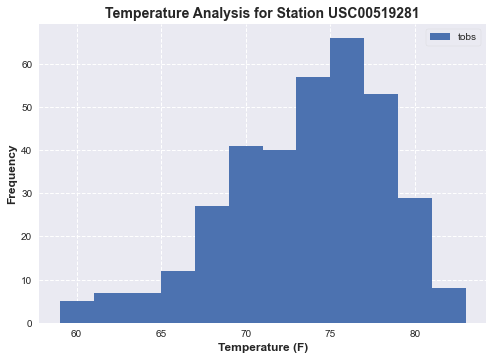

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_df=pd.DataFrame(result)
plt.hist(temp_df['tobs'],bins=12)
plt.title("Temperature Analysis for Station " + busiest, size=14, fontweight='bold')
plt.xlabel("Temperature (F)", size=12, fontweight='bold')
plt.ylabel("Frequency", size=12, fontweight='bold')
plt.legend(["tobs"], frameon=True, loc="upper right")
plt.grid(linestyle='--')
plt.show()

## Bonus Challenge Assignment

### Temperature Analysis I

In [25]:
temp_query = session.query(Measurement.date, Measurement.station, Measurement.tobs)
temp_df = pd.DataFrame(temp_query)
temp_df

,date,station,tobs
0,2010-01-01,USC00519397,65.0
1,2010-01-02,USC00519397,63.0
2,2010-01-03,USC00519397,74.0
3,2010-01-04,USC00519397,76.0
4,2010-01-06,USC00519397,73.0
...,...,...,...
19545,2017-08-19,USC00516128,71.0
19546,2017-08-20,USC00516128,78.0
19547,2017-08-21,USC00516128,76.0
19548,2017-08-22,USC00516128,76.0


In [26]:
# Convert date column to datetime
temp_df.date=pd.to_datetime(temp_df.date, infer_datetime_format=True)

# Set index to date & drop duplicate date column
temp_df = temp_df.set_index(temp_df['date'])
temp_df = temp_df.drop(columns='date')
temp_df

,station,tobs
date,,
2010-01-01,USC00519397,65.0
2010-01-02,USC00519397,63.0
2010-01-03,USC00519397,74.0
2010-01-04,USC00519397,76.0
2010-01-06,USC00519397,73.0
...,...,...
2017-08-19,USC00516128,71.0
2017-08-20,USC00516128,78.0
2017-08-21,USC00516128,76.0


In [27]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.
june_df = temp_df[temp_df.index.month == 6]
dec_df = temp_df[temp_df.index.month == 12]

In [28]:
# Get the average of June & December
june_mean = june_df['tobs'].mean()
dec_mean = dec_df['tobs'].mean()
print("The June mean is {} and December mean is {}".format(june_mean,dec_mean))

The June mean is 74.94411764705882 and December mean is 71.04152933421226


In [29]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#stats.ttest_ind(mean_june, mean_dec, equal_var=False)
stats.ttest_ind(june_df['tobs'], dec_df['tobs'])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

#### Did you use a paired t-test, or an unpaired t-test? Why?

In [30]:
# An unparied t-test was used because the samples are independent. The values in one sample reveal no information about
# those of the other sample.
#     -  In other words, June has a range of temperatures that are NOT dependent on the range of temeratures in December.  
#     -  The mean for the two months are unrelated.

# Based on the Ttest, a meaningful difference exists between the temperature in June and December because of the following:
#     -  The greater the magnitude of T, the greater the evidence against the null hypothesis.
#     -  This means there is greater evidence that there is a significant difference. 
#     -  The closer T is to 0, the more likely there isn't a significant difference.
#     -  The high p-value supports a meaningful difference exists as well.

### Temperature Analysis II

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
min_t, avg_t, max_t = calc_temps('2017-06-15', '2017-06-30')[0]
min_t, avg_t, max_t

(71.0, 77.01980198019803, 82.0)

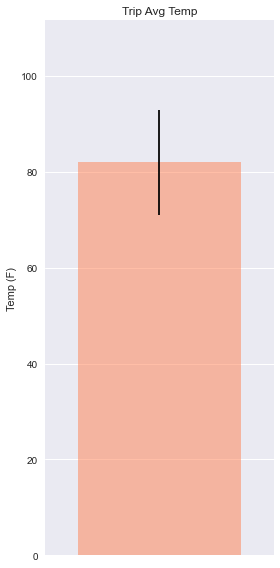

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = max_t - min_t
bar = ax.bar(xpos, max_t, yerr = yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
fig.tight_layout()
fig.show(warn = False)

### Daily Rainfall Average

In [34]:
# Calculate total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [35]:
#Clarify trip dates and previous year's matching dates for results of historical precipitation
trip_start = '2017-06-15'
trip_end = '2017-06-30'

PY_trip_start = '2016-06-15'
PY_trip_end = '2016-06-30'

In [36]:
# List precipitation amount in descending order as well as station, name, latitude, longitude, and elevation
rainfall = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= PY_trip_start)\
.filter(Measurement.date <= PY_trip_end)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

In [37]:
# Print in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

print()
print (f"Historical rainfall per weather station in descending order is as follows:")
print()
print (f"    Trip Dates: {trip_start} - {trip_end}\n    Most Recent Data Search Dates: {PY_trip_start} - {PY_trip_end}")
print()
for row in rainfall:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")
    print()


Historical rainfall per weather station in descending order is as follows:

    Trip Dates: 2017-06-15 - 2017-06-30
    Most Recent Data Search Dates: 2016-06-15 - 2016-06-30

Station:  USC00516128
    Rainfall:  8.28  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station:  USC00519281
    Rainfall:  4.04  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station:  USC00513117
    Rainfall:  2.13  
    Location:  KANEOHE 838.1, HI US
    Elevation:  14.6      Latitude:  21.4234  Longitude:  -157.8015

Station:  USC00514830
    Rainfall:  1.68  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0      Latitude:  21.5213  Longitude:  -157.8374

Station:  USC00517948
    Rainfall:  0.60  
    Location:  PEARL CITY, HI US
    Elevation:  11.9      Latitude:  21.3934  Longitude:  -157.9751

Station:  USC00519523
    Rainfall:  0.58  
 

### Daily Temperature Normals

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(day_date):
    temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                          filter(func.strftime("%m-%d", Measurement.date) == day_date).all()
    return temps

In [40]:
#create a list of dates for your trip 
trip_dates = pd.date_range(trip_start, trip_end)

#format it to %m-%d
trip_mmdd = trip_dates.strftime('%m-%d')

In [41]:
# Calculate the daily normals for your trip
# Push each tuple of calculations into a list called `normals`

normals_list = []
for trip_date in trip_mmdd:
    # IMPORTANT: Unpack daily_normals
    normals_list.append(*daily_normals(trip_date))

# Set the start and end date of the trip
# Use the start and end date to create a range of dates

trip_dates = pd.date_range(trip_start, trip_end)

# Strip off the year and save a list of %m-%d strings
trip_mmdd = trip_dates.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date

In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals_list, columns = ['Tmin', 'Tavg', 'Tmax'])

# Set trip dates as the index
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')

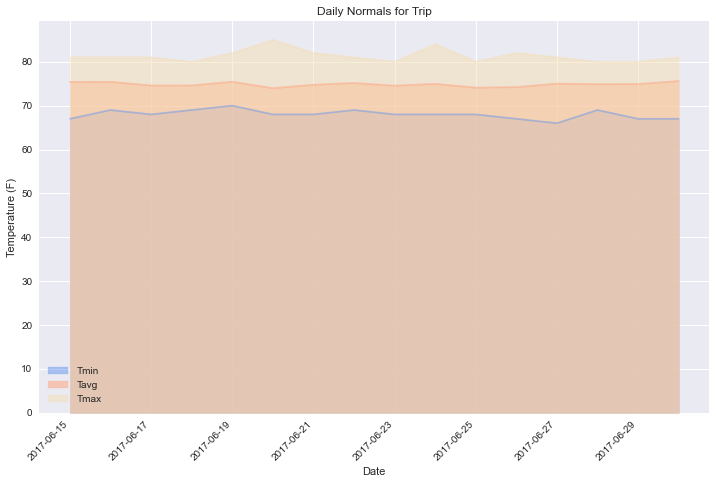

In [43]:
# Plot the daily normals as an area plot with `stacked=False`

# Create a colors list
colors = ['cornflowerblue', 'lightsalmon', 'wheat']

# Create an area plot for the predicted temps
normals_df.plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True, color=colors,\
                title='Daily Normals for Trip', rot=45)

# Create labels
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
#plt.legend(facecolor='white', framealpha=1)

plt.show()